In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# 1- Examine the distribution and importance of key variables including visual and statistical analysis.

## We will begin by importing the data into a pandas data frame and examining the data

In [2]:
df = pd.read_csv("Telecom-Usage-Details.csv")
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### We notice somethings here:
1. SeniorCitizen Column has the Dtype of int64 although it's a categorical variable
2. TotalCharges values are not numerical

We will start analyzing the data and fixing these issues.

In the TotalCharges some records are " ", we will replace them with 0 and change the column to numeric values.

In the SeniorCitizen column we will replace 1 values with "yes" and 0 values with "no".

In [4]:
replace_empty_with_0 = lambda x: "0" if x[0] ==" " else x
df.TotalCharges = df.TotalCharges.apply(replace_empty_with_0)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

encode_SeniorCitizen = lambda x: "yes" if x ==1 else "no"
df.SeniorCitizen = df.SeniorCitizen.apply(encode_SeniorCitizen)

In [5]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


#### Now all the features are the correct type, we will then make sure that we don't have any duplicate customerID or any duplicate values

In [6]:
df = df.dropna()
len(df.customerID.value_counts())

7043

#### Good! that matches the counts above our data is in good shape. We will start analyzing.

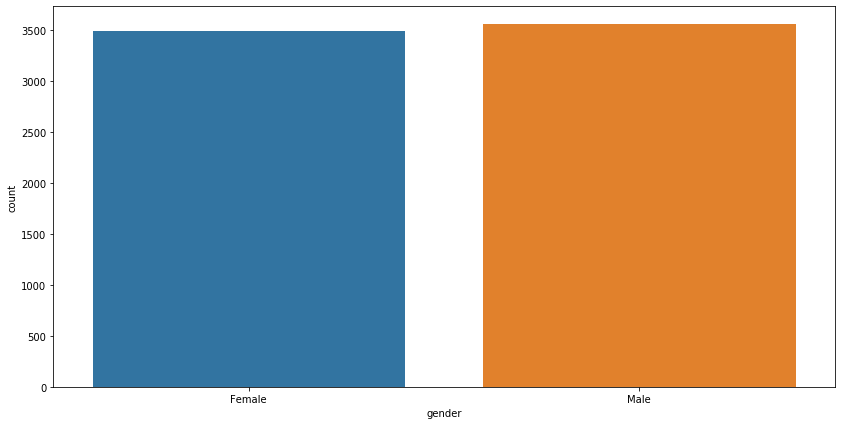

In [7]:
sns.countplot(x="gender", data=df)

#### We have more or less equal distribution of male and female

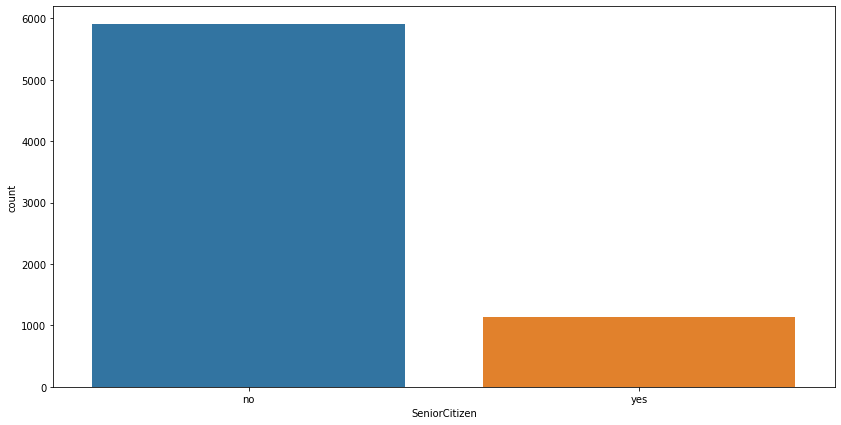

In [8]:
sns.countplot(x="SeniorCitizen", data=df)

#### Only a minority of our customers are senior citizens.

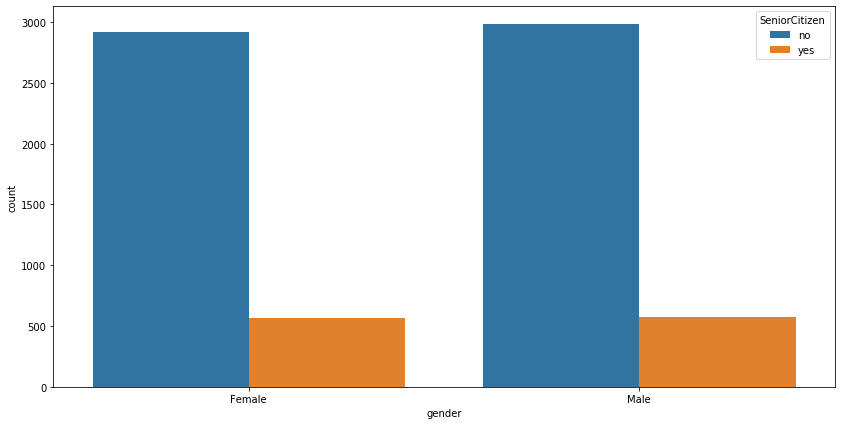

In [9]:
sns.countplot(x="gender", hue="SeniorCitizen", data=df)

#### but we have the same distribution of ages across male and female customers

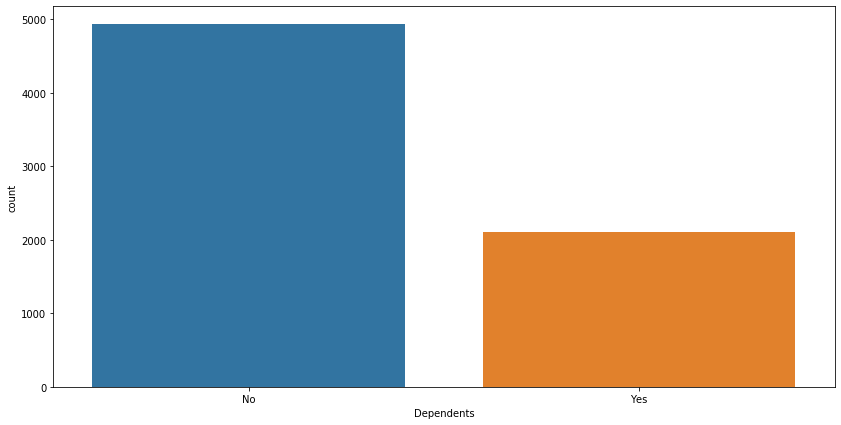

In [10]:
sns.countplot(x="Dependents", data= df)

#### We have more customers with no dependents than without

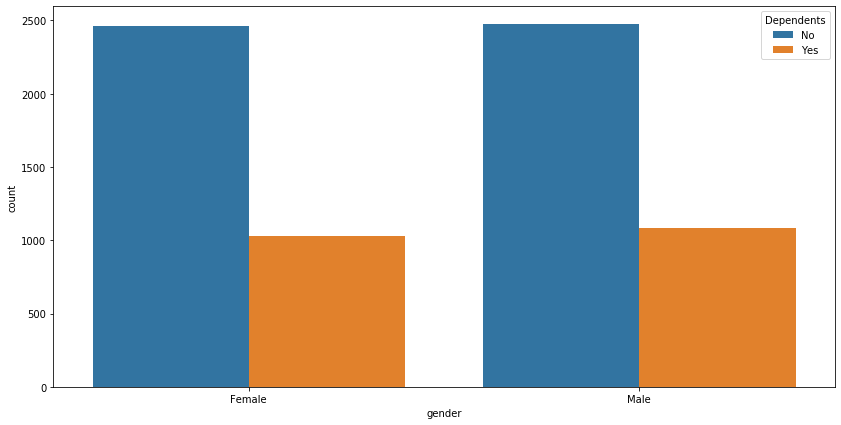

In [11]:
sns.countplot(x="gender", hue="Dependents", data=df)

#### But again across the genders the distribution is equal.

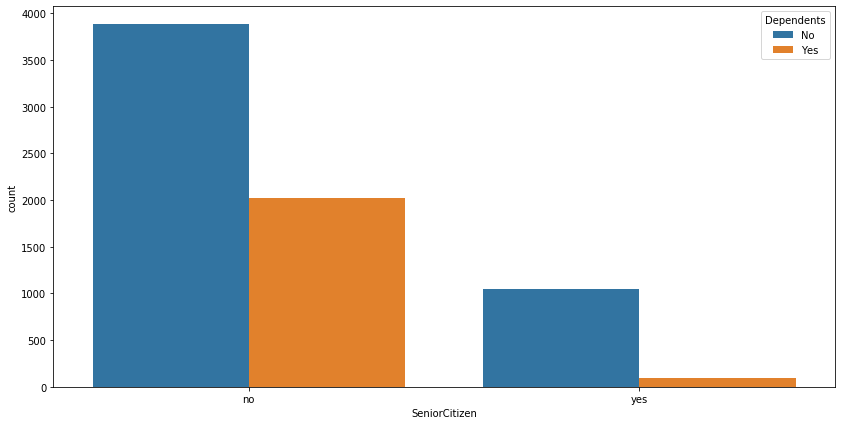

In [12]:
sns.countplot(x="SeniorCitizen", hue="Dependents", data=df)

#### We notice here that nonsenior citizens are more likely to have dependents.

### Now that we have a good understanding if the demographic data of our customers we will start looking at the services they use

In [13]:
df_services = df.iloc[:,6:14]
df_services

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
0,No,No phone service,DSL,No,Yes,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No
4,Yes,No,Fiber optic,No,No,No,No,No
...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes
7040,No,No phone service,DSL,Yes,No,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No


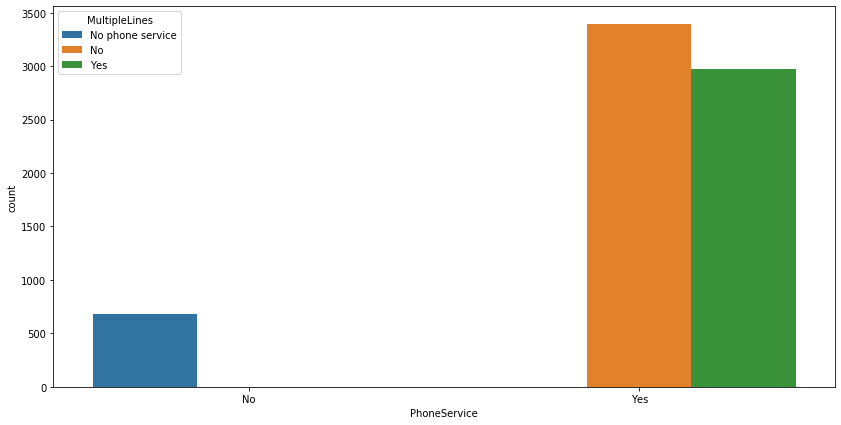

In [14]:
sns.countplot(x="PhoneService", hue="MultipleLines", data=df)

#### Most of our customers have phone service and a good percentage of them have multiple lines

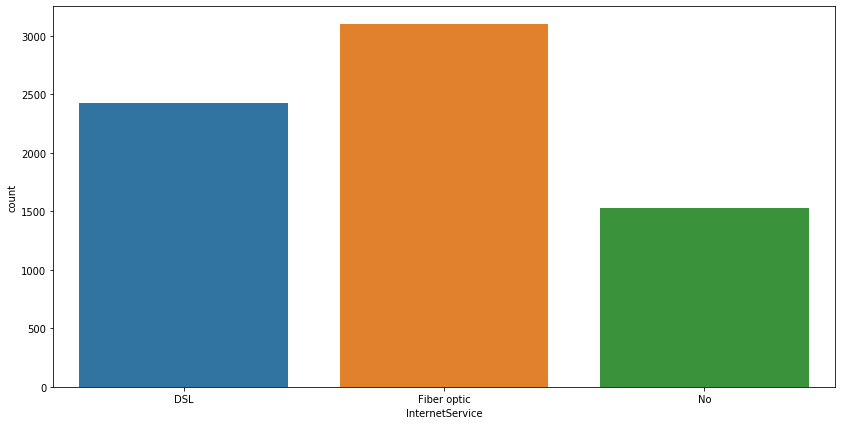

In [15]:
sns.countplot(x="InternetService", data=df)

#### However, a significant number of our customers don't have internet service with us. Fiber Optic service is more popular than DSL

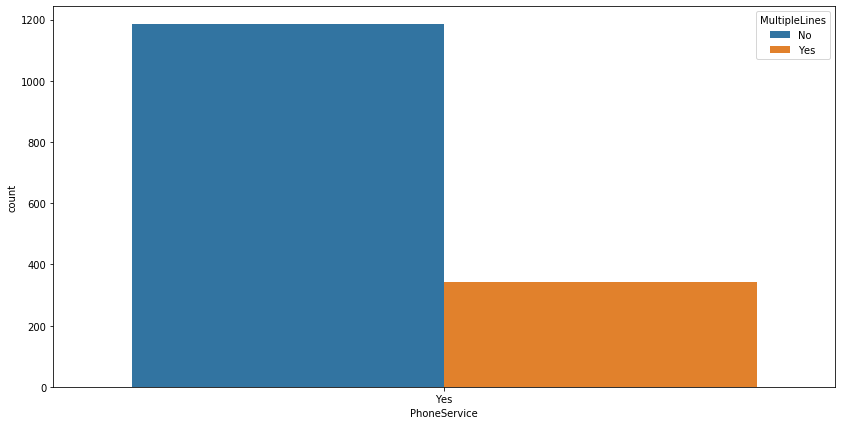

In [16]:
df_services_no_internet = df_services[df_services.InternetService == "No"]
sns.countplot(x="PhoneService", hue="MultipleLines", data=df_services_no_internet)

#### Our customers with no internet service mostly have single lines meaning they are likely to be low-value customers

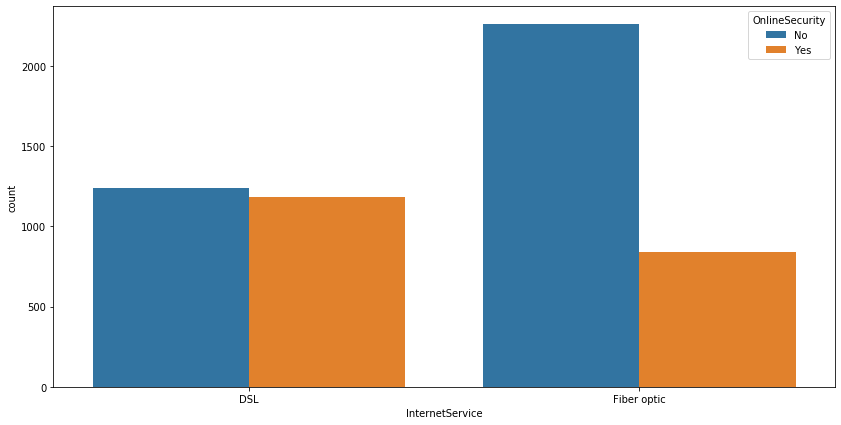

In [17]:
df_internet = df_services[df_services.InternetService != "No"]
sns.countplot(x="InternetService", hue="OnlineSecurity", data=df_internet)

#### Our online security service is more popular with our DSL users compared to Fiber Optic users.

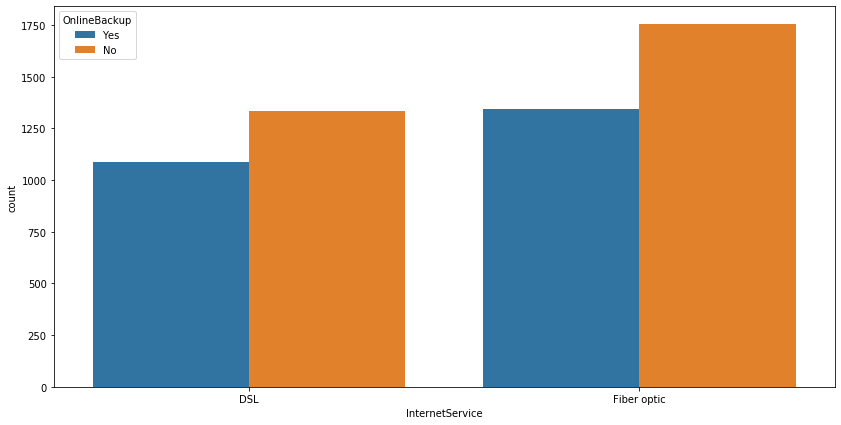

In [18]:
sns.countplot(x="InternetService", hue="OnlineBackup", data=df_internet)

#### However our Online Backup service is more popular with Fiber optic users. Possibly because they can benefit from faster speeds

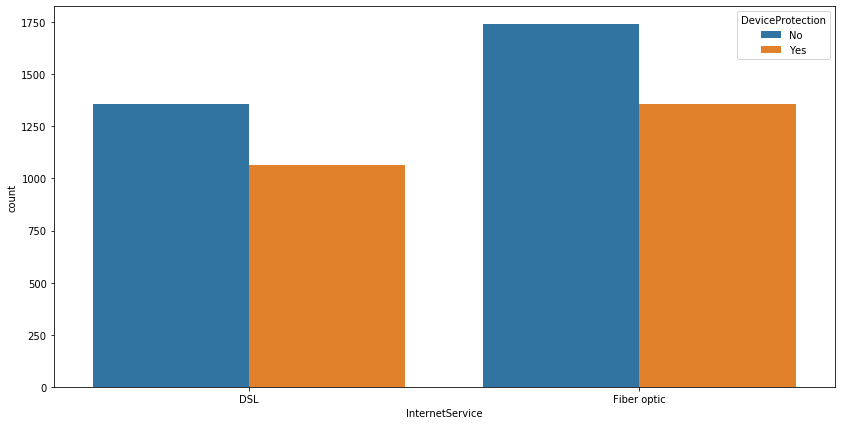

In [19]:
sns.countplot(x="InternetService", hue="DeviceProtection", data=df_internet)

#### similar subsets of our customers buy the device protection service across DSL and Fiber optic

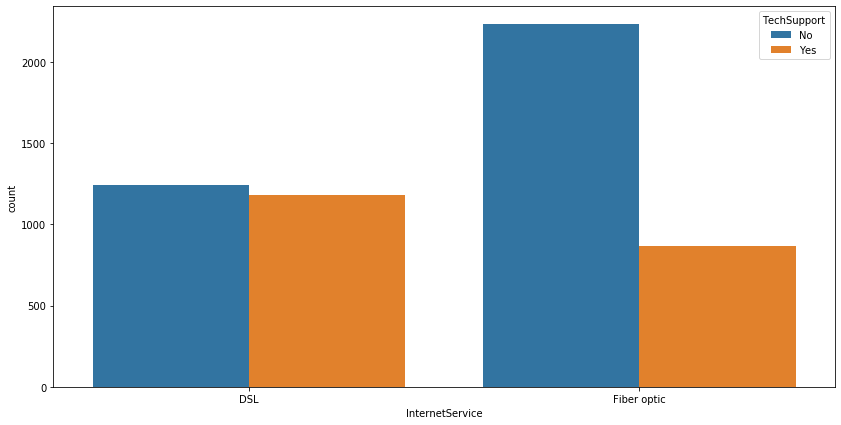

In [20]:
sns.countplot(x="InternetService", hue="TechSupport", data=df_internet)

#### The tech support service is much more popular with DSL customers. Possibly because fiber optic customers are more advanced users

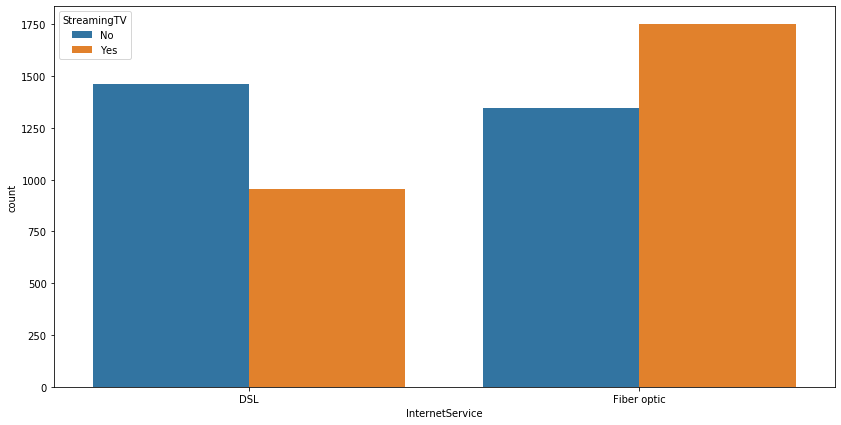

In [21]:
sns.countplot(x="InternetService", hue="StreamingTV", data=df_internet)

#### Again Streaming is popular with optic fiber users possibly because of the faster internet speeds

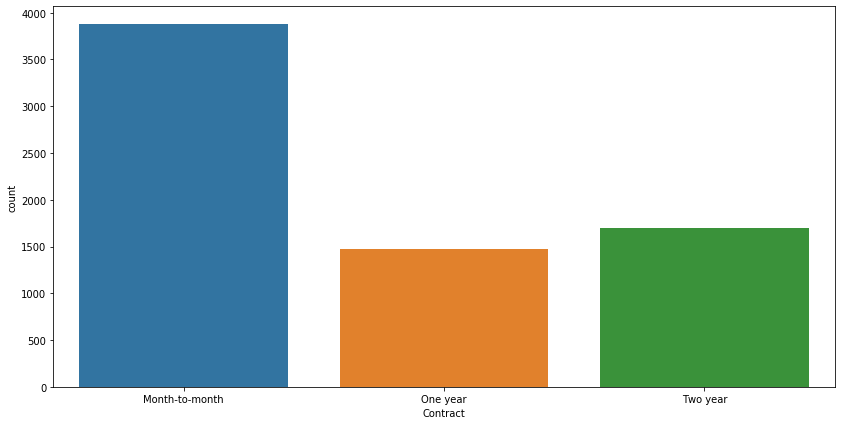

In [22]:
sns.countplot(x="Contract", data=df)

#### A significant portion of our customers are month-to-month customers. this is risky because they can cancel their service without breaching a contract

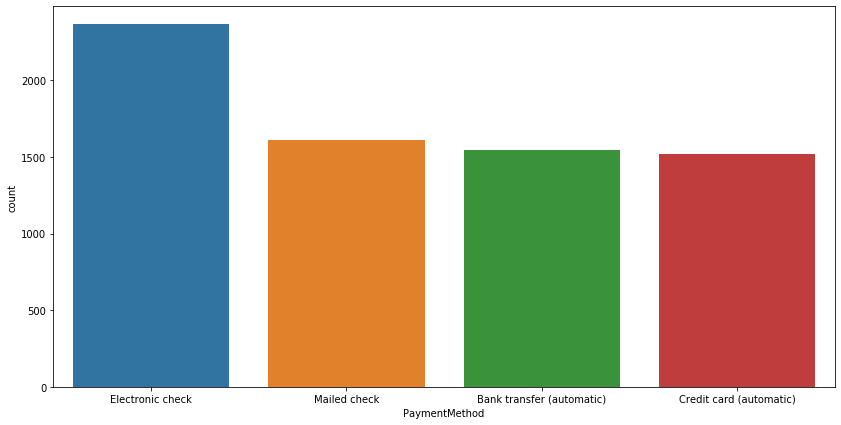

In [23]:
sns.countplot("PaymentMethod", data=df)

#### There's an oppurtinuty here to convert customers using electronic or mailed checks to an automatic payment method

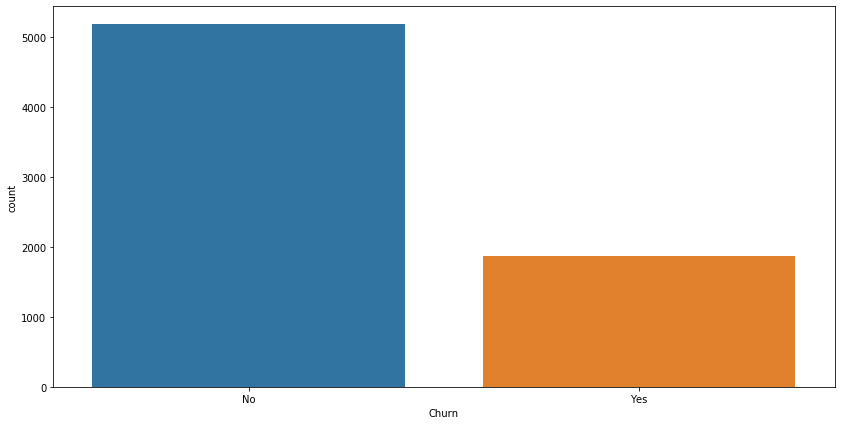

In [24]:
sns.countplot("Churn", data= df)

#### This is the distribution of customers from the prespective of churn

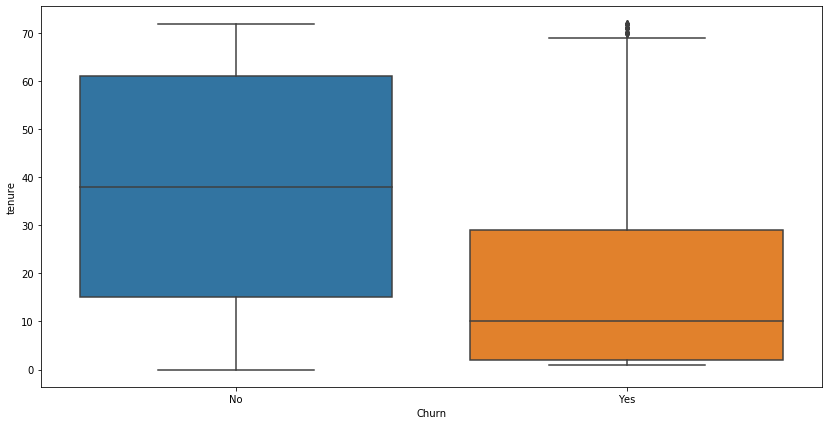

In [25]:
sns.boxplot(y="tenure", x="Churn", data=df)

#### newer customers are more likely to churn

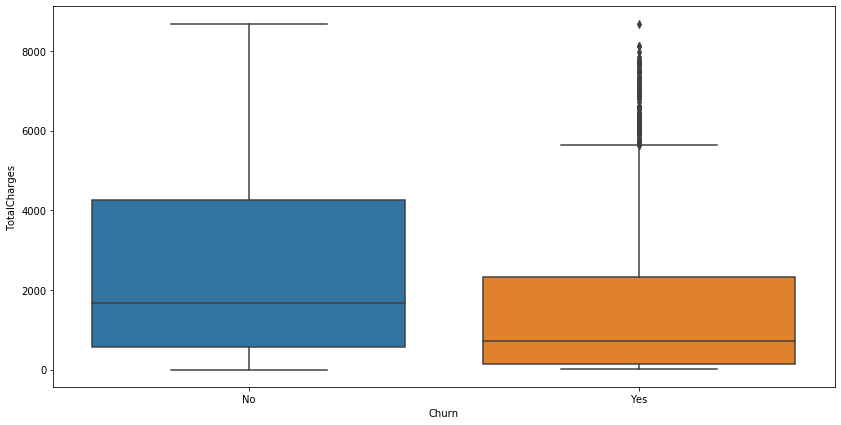

In [26]:
sns.boxplot(y="TotalCharges", x="Churn", data=df)

#### and lower value customers are more likely to churn. It's rare for our high-valued customers to churn since they are represented as outliers

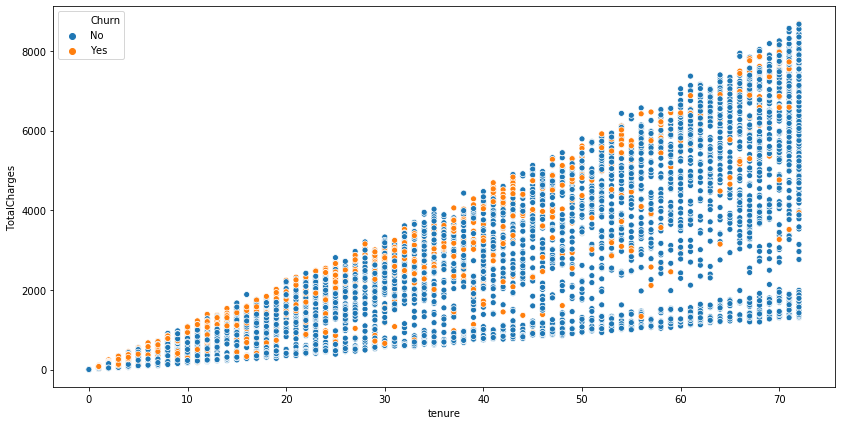

In [27]:
sns.scatterplot(x = "tenure", y="TotalCharges", hue="Churn", data=df)

#### This is the relatuinship between tenure and Totalcharges. We see that our lower valued customers are more likely to churn. less tenured customers are also likely to churn more.

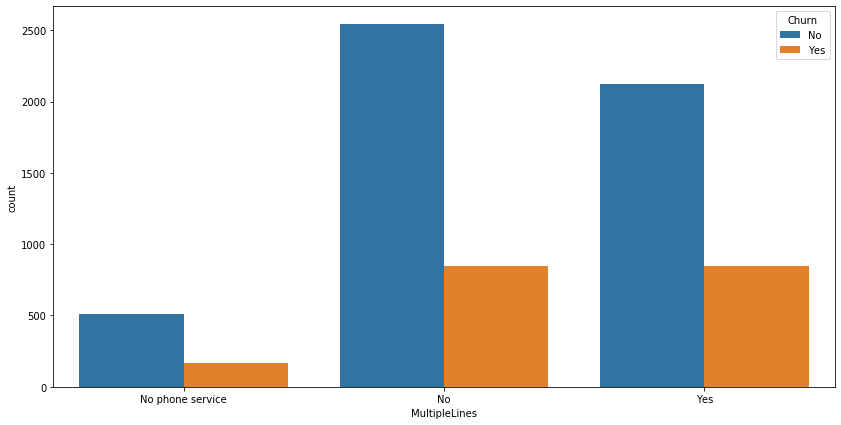

In [28]:
sns.countplot(x="MultipleLines", hue="Churn", data=df)

#### It doesn't appear that the type of phone service is significantly correlated to churn.

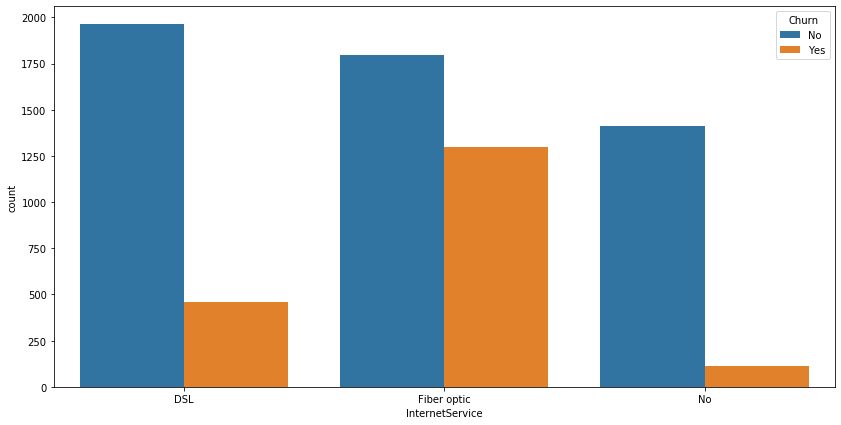

In [29]:
sns.countplot(x="InternetService", hue="Churn", data=df)

### This graph is very informative. First of all, we see that our fiber optic customers are unsatisfied and likely to churn. we also see that our phone only customers are more satisfied and unlikely to churn

## Suppose we call 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies' Add on internet services
We will calculate the number of add-on services each customer has and study the relationship between that and the churn

In [30]:
df_addon = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']]
service_counter = lambda x: 1 if x =="Yes" else 0

df_addon = df_addon.applymap(service_counter)

In [31]:
import numpy as np
n_of_addon_services = np.sum(np.asarray(df_addon),axis=1)
df["n_of_addon_services"] = n_of_addon_services

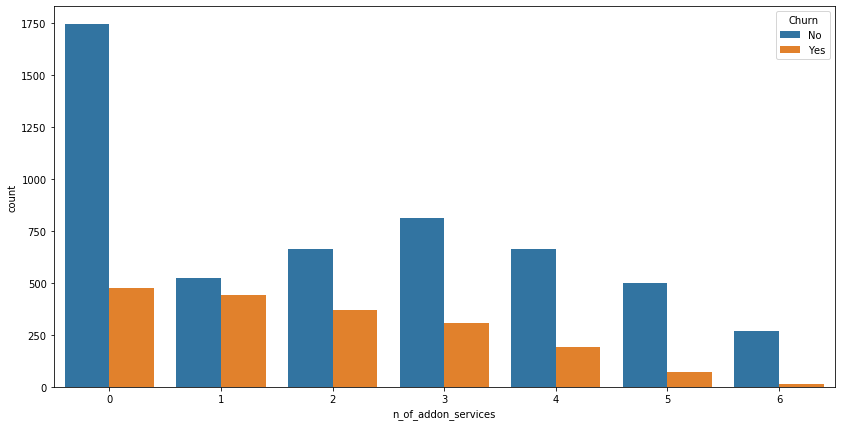

In [32]:
sns.countplot(x="n_of_addon_services", hue="Churn", data=df)

## we see that the more services our custoner has, the less likely they are to leave.

# 2- Find out the best way to segment customers using K-means based on the Tenure and Total Charges variables in the dataset

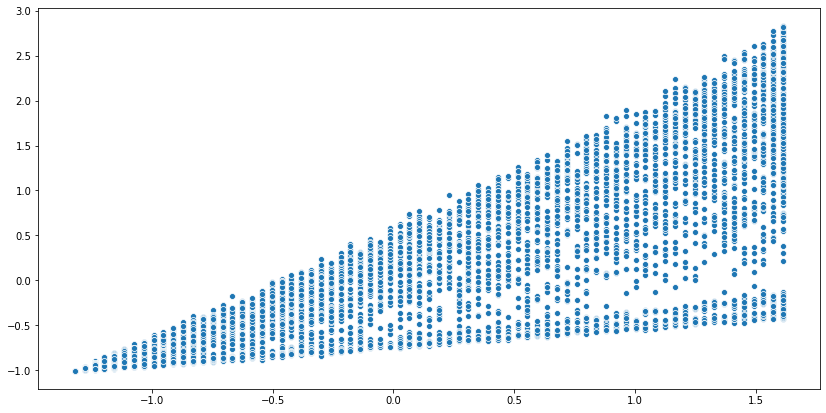

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["tenure", "TotalCharges"]]
y = df["customerID"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.scatterplot(X_scaled[:,0], X_scaled[:,1])

We begin by scaling Customer tenurity on the x-axis and customer total charges on the y-axis so our clustering could run more efficiently

### To find the optimal number of clusters we will use the elbow method
we will plot the within cluster square sum of distance for each number of clusters

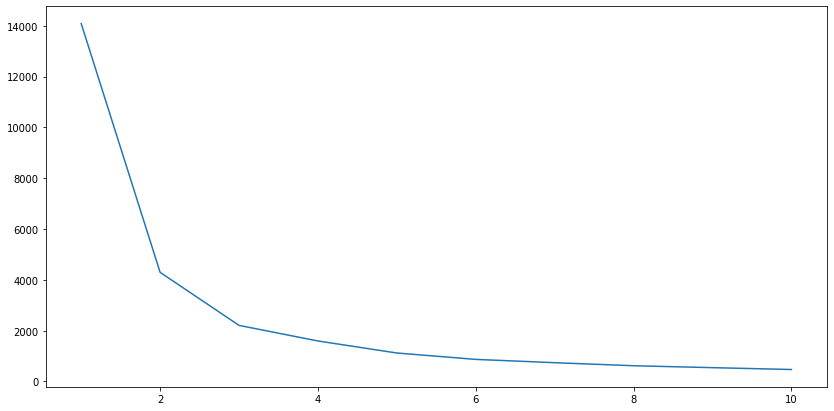

In [34]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(X_scaled)
    WCSS.append(model.inertia_)
sns.lineplot(range(1,11), WCSS)

### We will try 3, 4, 6 and 10 clusters

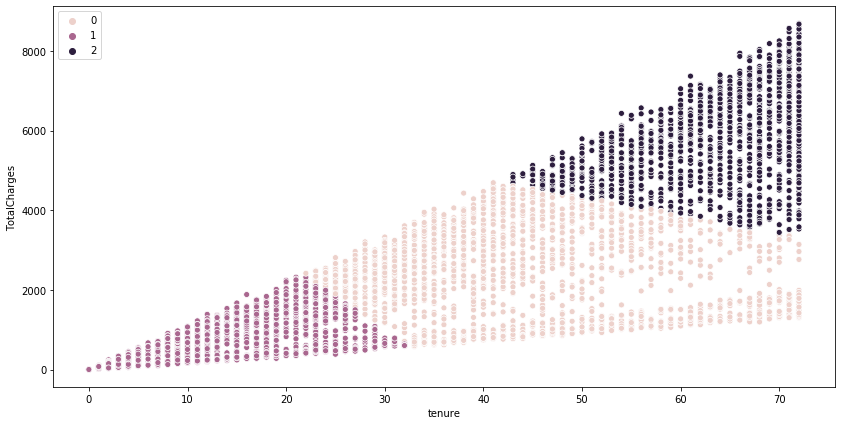

In [35]:
model_3 = KMeans(n_clusters=3, init="k-means++")
y = model_3.fit_predict(X_scaled)
sns.scatterplot(x = "tenure", y="TotalCharges", hue=y, data=df)

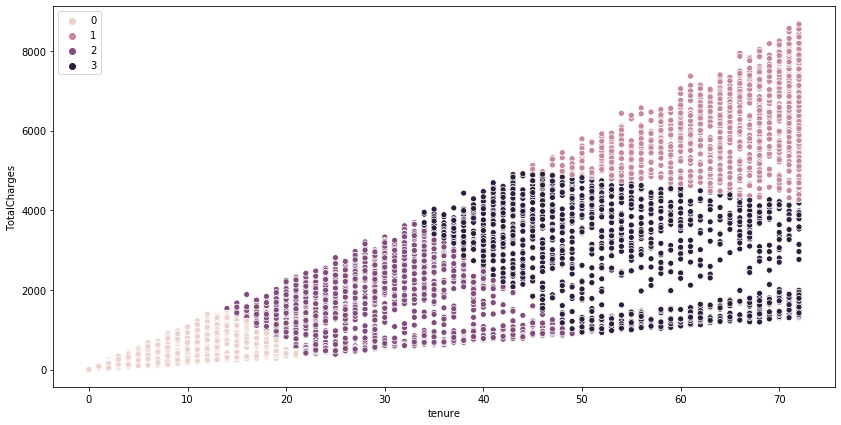

In [36]:
model_4 = KMeans(n_clusters=4, init="k-means++")
y = model_4.fit_predict(X_scaled)
sns.scatterplot(x = "tenure", y="TotalCharges", hue=y, data=df)

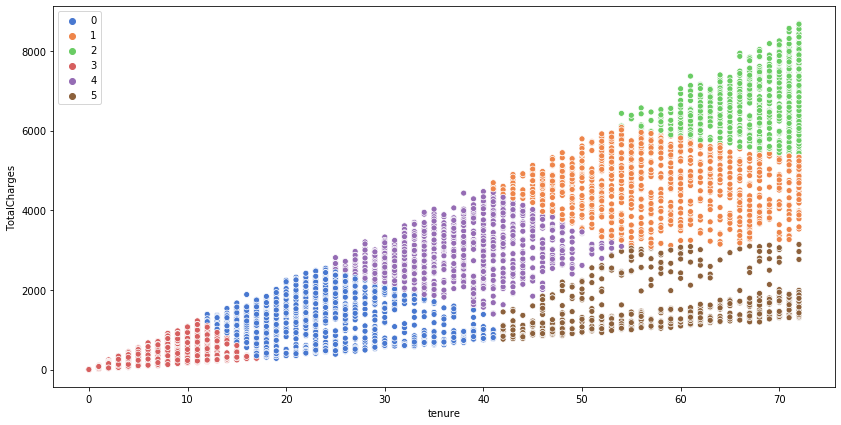

In [38]:
model_6 = KMeans(n_clusters=6, init="k-means++")
y = model_6.fit_predict(X_scaled)
sns.scatterplot(x = "tenure", y="TotalCharges", hue=y, data=df,legend="full", palette="muted")

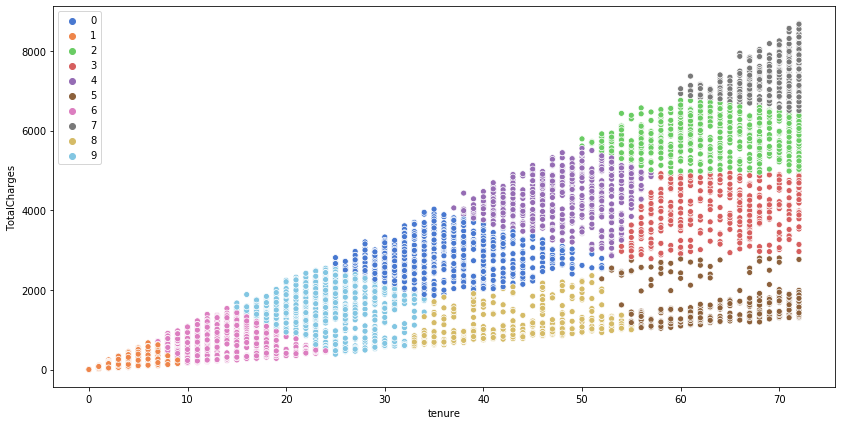

In [38]:
model_10 = KMeans(n_clusters=10, init="k-means++")
y = model_10.fit_predict(X_scaled)
sns.scatterplot(x = "tenure", y="TotalCharges", hue=y, data=df,legend="full", palette="muted")

### In my opinion 6 clusters is the most logical option
The six clusters provide a good indication of customer's tenurity vs. their value we will begin applying labels to these clusters and we will analyze more

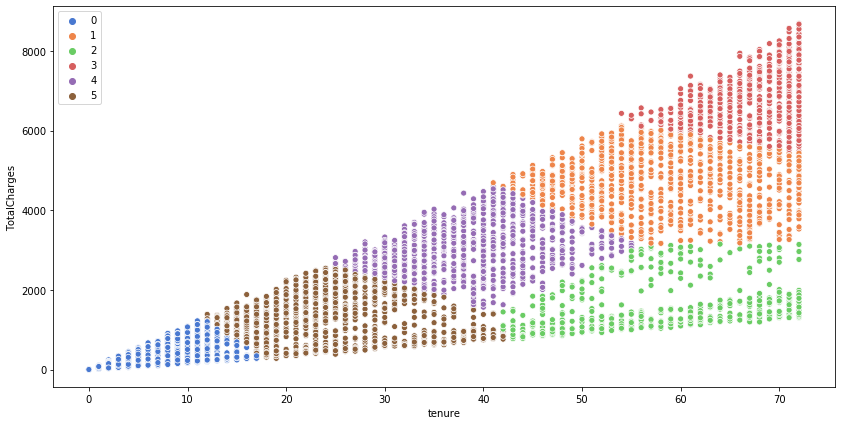

In [40]:
model_6 = KMeans(n_clusters=6, init="k-means++")
y = model_6.fit_predict(X_scaled)
sns.scatterplot(x = "tenure", y="TotalCharges", hue=y, data=df,legend="full", palette="muted")

In [41]:
my_dict = {
    0:"low Ten/low Val",
    1:"high Ten/high-int Val",
    2:"high Ten/low Val",
    3:"high Ten/High Val",
    4:"int Ten/int Val",
    5:"int Ten/low-int Val"
}

customerSegment = []
for i in y:
    customerSegment.append(my_dict[int(i)])

df["customerSegment"] = customerSegment

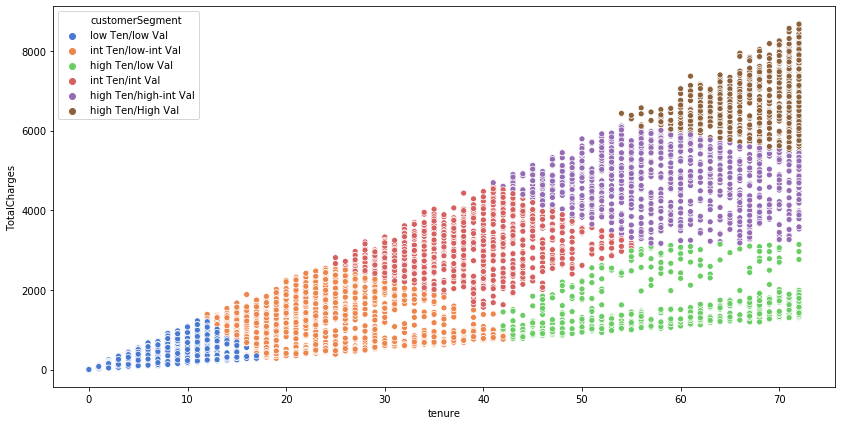

In [42]:
sns.scatterplot(x = "tenure", y="TotalCharges", hue="customerSegment", data=df,legend="full", palette="muted")

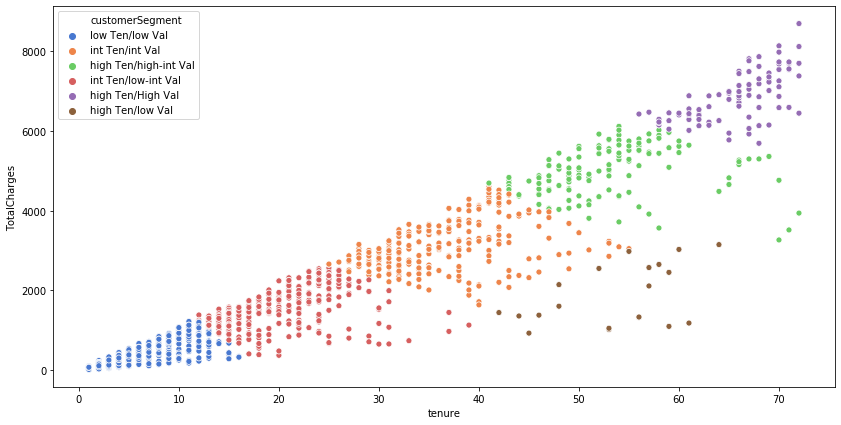

In [43]:
sns.scatterplot(x = "tenure", y="TotalCharges", hue="customerSegment", data=df[df.Churn == "Yes"],legend="full", palette="muted")

## This plot shows customers who churned and their segment
### We can see that some customer segments are more likely to churn than others

In [44]:
df_segmented = df.groupby(['customerSegment','Churn']).agg({'customerID': 'count'})
df_segmented

customerID
customerSegment       Churn            
high Ten/High Val     No            700
                      Yes            89
high Ten/high-int Val No            812
                      Yes           134
high Ten/low Val      No            643
                      Yes            20
int Ten/int Val       No            633
                      Yes           233
int Ten/low-int Val   No           1076
                      Yes           335
low Ten/low Val       No           1310
                      Yes          1058

In [45]:
calc_pct = lambda x: round(100 * x / float(x.sum()),2)
Churn_percentages =df_segmented.groupby(level=0).apply(calc_pct)
Churn_percentages

customerID
customerSegment       Churn            
high Ten/High Val     No          88.72
                      Yes         11.28
high Ten/high-int Val No          85.84
                      Yes         14.16
high Ten/low Val      No          96.98
                      Yes          3.02
int Ten/int Val       No          73.09
                      Yes         26.91
int Ten/low-int Val   No          76.26
                      Yes         23.74
low Ten/low Val       No          55.32
                      Yes         44.68

### We can say here that our most at risk customers are:
1. Low tenurity and low value customers (44.68% churn rate)
2. Intermediate Tenurity and Intermediate value customers (26.91% churn rate)
3. Intermediate tenurity and low-intermediate value customers (23.74% churn rate)

### Our safest customers are:
1. High tenurity and low value customers (3.02% churn rate)
2. High tenurity and High value customers (11.28% churn rate)
3. High tenurity and high-intermediate value customers (14.16% churn rate)

It follows business logic that customers with the least churn are high tenurity and low value customers (ex. a sensior citizen who has only one line and has been with the company for a long time) and that customers with the highest churn rates are low tenurity and low value customers (ex. tourists buying single lines or people buying burner phones).

it's positive that most of the churn rates are happening in intermediate to low value customers. it follows logic that customers who are deeply investing in our service are less likely to leave.

# 3- Build simple models using Logistic Regression to predict customer churn behavior based on the most important variables in the provided dataset.

## Feature Engineering

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'n_of_addon_services', 'customerSegment'],
      dtype='object')

In [47]:
encoded_df = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','n_of_addon_services', 'customerSegment']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_array = ordinal_encoder.fit_transform(encoded_df)

from itertools import count
j = count(start=0, step = 1)
for i in encoded_df.columns:
    encoded_df[i] = encoded_array[:,next(j)]

### We encoded all of our categorical Features
We give the categorical features numerical values so we can plug them in the model

In [48]:
encoded_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,n_of_addon_services,customerSegment
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,4.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,5.0,4.0
7039,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,4.0,0.0
7040,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0
7041,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,5.0


In [49]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])

### We also scaled the numerical features
We will now make a new df called processed_df with all of these processed values

In [50]:
processed_df = df
processed_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','n_of_addon_services', 'customerSegment']] = encoded_df
processed_df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaled_numeric

### We will then encode our target feature (Churn)

In [51]:
from sklearn.preprocessing import LabelEncoder
labelizer = LabelEncoder()
processed_df["Churn"] = labelizer.fit_transform(processed_df["Churn"])

## Making the train and test sets
Since the data is not equally distributed across the Churn and the customerSgement columns we have to respect that when we sample the data. We want our training and test sets to have the same distribution as the original dataset. for this purpose we will use stratified split.

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
for train_index, test_index in split.split(processed_df, processed_df["customerSegment"], processed_df["Churn"]):
    strat_train_set = processed_df.loc[train_index]
    strat_test_set = processed_df.loc[test_index]

In [53]:
strat_train_set.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'n_of_addon_services', 'customerSegment'],
      dtype='object')

In [54]:
X_train = strat_train_set[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'n_of_addon_services', 'customerSegment']]
y_train = strat_train_set['Churn']

X_test = strat_test_set[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'n_of_addon_services', 'customerSegment']]
y_test = strat_test_set['Churn']

## Feature Selection
We will use statsmodels logistic regression model and only keep features that are statistically significant to the model

In [55]:
import statsmodels.discrete.discrete_model as ds


model= ds.MNLogit(y_train,X_train)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.420797
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                        MNLogit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           20
Date:                Sun, 08 Mar 2020   Pseudo R-squ.:                  0.2765
Time:                        06:41:09   Log-Likelihood:                -2074.5
converged:                       True   LL-Null:                       -2867.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
            Churn=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gender                 -0.0509      0.077     -0.663      0.507      -0.201       0.100
SeniorCitizen           0.2352      0.099      2.366      0.018       0.040       0.430
Partner                -0.0750      0.092     -0.819      0.413      -0.254       0.105
Dependents             -0.0568      0.106     -0.534      0.593      -0.265       0.152
tenure                 -1.7874      0.194     -9.194      0.000      -2.168      -1.406
PhoneService           -0.2464      0.224     -1.101      0.271      -0.685       0.192
MultipleLines           0.1492      0.050      2.981      0.003       0.051       0.247
InternetService         1.1344      0.252      4.500      0.000       0.640       1.628
OnlineSecurity         -0.7160      0.136     -5.249      0.000      -0.983      -0.449
OnlineBackup           -0.6245      0.137     -4.572      0.000      -0.892      -0.357
DeviceProtection       -0.5666      0.134     -4.217      0.000      -0.830      -0.303
TechSupport            -0.7312      0.134     -5.465      0.000      -0.993      -0.469
StreamingTV            -0.3346      0.115     -2.900      0.004      -0.561      -0.109
StreamingMovies        -0.3471      0.117     -2.974      0.003      -0.576      -0.118
Contract               -0.7205      0.090     -7.973      0.000      -0.898      -0.543
PaperlessBilling        0.3404      0.089      3.842      0.000       0.167       0.514
PaymentMethod           0.0389      0.042      0.930      0.352      -0.043       0.121
MonthlyCharges         -0.3358      0.270     -1.245      0.213      -0.865       0.193
TotalCharges            0.1045      0.215      0.487      0.626      -0.316       0.525
n_of_addon_services     1.1092      0.296      3.747      0.000       0.529       1.689
customerSegment        -0.5256      0.109     -4.843      0.000      -0.738      -0.313
=======================================================================================
"""

In [56]:
def exclude_irrelevant_features(X,y):
    columns = list(X.columns)
    while len(columns) > 0:
        model= ds.MNLogit(y,X[columns])
        result=model.fit(disp=0)
        largest_pval = result.pvalues.nlargest(1,0)
        if float(largest_pval.iloc[0])> .05:
            col_name = largest_pval.index[0]
            columns.remove(col_name)
        else:
            break
    return columns

good_columns = exclude_irrelevant_features(X_train,y_train)

### This function will run the logistic regression model iteratively and each run it will exclude the feature with the highest p value from the list of features. Once all features have p value less than 5% the function will return a list of the remaining features

In [57]:
good_columns

['SeniorCitizen',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'n_of_addon_services',
 'customerSegment']

In [58]:
model= ds.MNLogit(y_train,X_train[good_columns])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.421218
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                        MNLogit   Df Residuals:                     4915
Method:                           MLE   Df Model:                           14
Date:                Sun, 08 Mar 2020   Pseudo R-squ.:                  0.2758
Time:                        06:41:09   Log-Likelihood:                -2076.6
converged:                       True   LL-Null:                       -2867.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
            Churn=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
SeniorCitizen           0.2398      0.097      2.463      0.014       0.049       0.431
tenure                 -1.8923      0.135    -14.025      0.000      -2.157      -1.628
MultipleLines           0.1655      0.046      3.567      0.000       0.075       0.257
InternetService         1.2774      0.207      6.177      0.000       0.872       1.683
OnlineSecurity         -0.8110      0.104     -7.823      0.000      -1.014      -0.608
OnlineBackup           -0.7171      0.105     -6.846      0.000      -0.922      -0.512
DeviceProtection       -0.6573      0.105     -6.279      0.000      -0.863      -0.452
TechSupport            -0.8228      0.102     -8.093      0.000      -1.022      -0.624
StreamingTV            -0.4058      0.093     -4.344      0.000      -0.589      -0.223
StreamingMovies        -0.4181      0.095     -4.415      0.000      -0.604      -0.232
Contract               -0.7438      0.089     -8.356      0.000      -0.918      -0.569
PaperlessBilling        0.3321      0.088      3.781      0.000       0.160       0.504
MonthlyCharges         -0.5512      0.183     -3.014      0.003      -0.910      -0.193
n_of_addon_services     1.3240      0.213      6.224      0.000       0.907       1.741
customerSegment        -0.6317      0.057    -11.015      0.000      -0.744      -0.519
=======================================================================================
"""

### These columns are the columns with the relevant pval (<5%) so we will only train our models on them
### We also notice that the correlation coefficient of these features are significantly high

## Making the three models
A different random_state is used every time before we sample the training and test datasets. we use the resulting datasets to train each of our models. 
### Model 1

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test

model1 = LogisticRegression()
model1.fit(X_train1[good_columns],y_train1)
y_pred1 = model1.predict(X_test1[good_columns])

accuracy_score(y_test1, y_pred1)

0.8078561287269286

### Model 2

In [60]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=1)
for train_index, test_index in split.split(processed_df, processed_df["customerSegment"], processed_df["Churn"]):
    strat_train_set = processed_df.loc[train_index]
    strat_test_set = processed_df.loc[test_index]

X_train2 = strat_train_set[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'n_of_addon_services', 'customerSegment']]
y_train2 = strat_train_set['Churn']

X_test2 = strat_test_set[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'n_of_addon_services', 'customerSegment']]
y_test2 = strat_test_set['Churn']

model2 = LogisticRegression()
model2.fit(X_train2[good_columns],y_train2)
y_pred2 = model2.predict(X_test2[good_columns])

accuracy_score(y_test2, y_pred2)

0.8106956933270232

### Model 3

In [61]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=2)
for train_index, test_index in split.split(processed_df, processed_df["customerSegment"], processed_df["Churn"]):
    strat_train_set = processed_df.loc[train_index]
    strat_test_set = processed_df.loc[test_index]

X_train3 = strat_train_set[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'n_of_addon_services', 'customerSegment']]
y_train3 = strat_train_set['Churn']

X_test3 = strat_test_set[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'n_of_addon_services', 'customerSegment']]
y_test3 = strat_test_set['Churn']

model3 = LogisticRegression()
model3.fit(X_train3[good_columns],y_train3)
y_pred3 = model3.predict(X_test3[good_columns])

accuracy_score(y_test3, y_pred3)

0.8031235210601041

# 4- Plot the ROC curve of the 3  models overlay them on same visual with the associated AUC result. 

In [62]:
fpr1, tpr1, thresholds1 = roc_curve(y_test1, model1.predict_proba(X_test1[good_columns])[:,1])
auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test2, model2.predict_proba(X_test2[good_columns])[:,1])
auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test3, model3.predict_proba(X_test3[good_columns])[:,1])
auc3 = auc(fpr3, tpr3)

## here we calculate the false positive rate and the true positive rate fore each of our models
FPR is the rate of predictions that were classified as positive (in our case yes for churn) while they are actually negative. TPR are predictions that were classified as positive and they are actually positive.

We passed a list of probabilities for our positive (yes) class to the roc_curve function. the function calculates the FPR and TPR by setting different decision thresholds from 0 to 1 and classifying the points based on the probabilities we passed (above the threshold is positive and below the threshold is negative).

the auc is the area under the curve for each model. higher values indicate a better model

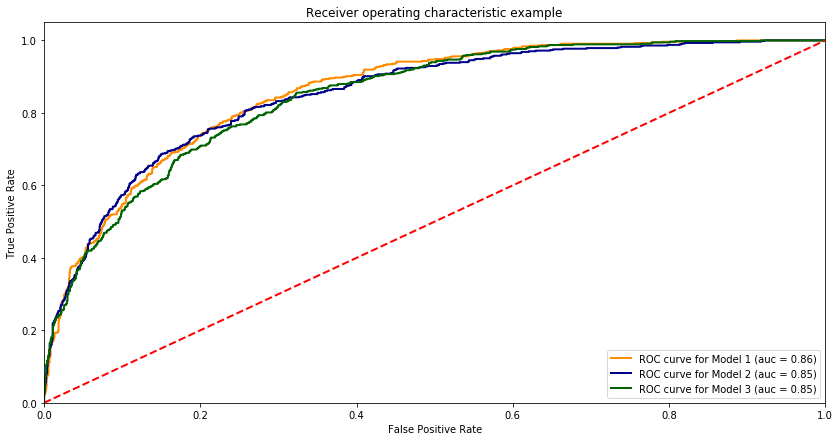

In [63]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',lw=lw, label='ROC curve for Model 1 (auc = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, color='darkblue',lw=lw, label='ROC curve for Model 2 (auc = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, color='darkgreen',lw=lw, label='ROC curve for Model 3 (auc = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")